# Project Prediction of heart disease

The goal of this project is to apply and compare different machine learning models to classify if an individual will have a heart disease or not.

### Data description

    1. age: age of the person in years 
    2. sex: gender of the person (1 = male, 0 = female)
    3. cp: chest pain type (0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic) ## anders herum?!
    4. trestbps: resting blood pressure 
    5. chol: serum cholestoral in mg/dl
    6. fbs: fasting blood sugar ( if > 120 mg/dl, then 1 = True. Else 0 = False)
    7. restecg: resting electrocardiographic results (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy)
    8. thalach: maximum heart rate achieved
    9. exang: exercise induced angina (1 = True, 0 = False)
    10. oldpeak: ST depression induced by exercise relative to rest
    11. slope: the slope of the peak exercise ST segment (1 = upsloping, 2 = flat, 3 = downsloping)
    12. ca: number of major vessels (0-3) colored by flourosopy
    13. thal: blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect) (1,2,3?! komplett falsch)
    14. target: heart disease (1 = True, 0 = False)


In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import statsmodels.api as sm
%matplotlib inline
#plt.style.use('ggplot')

from tqdm import tqdm # a python package that provides progress bars for iterables

#from tabulate import tabulate
from sklearn.ensemble import RandomForestClassifier  # for the model
from sklearn.tree import export_graphviz  # plot tree
from sklearn.model_selection import train_test_split  # for data splitting
from sklearn.decomposition import PCA
from sklearn.covariance import EllipticEnvelope
from sklearn.cluster import KMeans
import matplotlib.pyplot as pyplot
#import plotly.express as px
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns  # for plotting
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Informations about the data

In [2]:
#Read the data
df = pd.read_csv('heart.csv',na_values='?')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
############################################
# Unsere vorherige Lösung dann unnötig, wenn du diese Funktion gefunden hast nh?

# for column in df:
#     for zahl in df[column]:
#         if type(zahl) != int and type(zahl) != float:
#             print("Error")
            
# checking if there are any "None" values in the dataset
df_none = df.isna().sum()
print(df_none)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe().round(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [6]:
####################################### 
#Weiß nicht ob ich vlt dieses Diagramm doch lassen würde, um einfach mehr vielfalt an grafen zu haben 
#und das nach mehr "können" aussieht

# m = len(df[df.sex == 1])
# f = len(df[df.sex == 0])

# #Plot disribution of genders overall
# size = [m, f] 
# colors = ['lightblue', 'salmon']
# labels = "Male", "Female"
# #explode = [0, 0.01] #checke nicht wofür das gut sein soll

# circle = plt.Circle((0, 0), 0.7, color = 'white')

# plt.rcParams['figure.figsize'] = (8, 8)
# #plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
# plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
# plt.title('Distribution of Gender', fontsize = 20)
# p = plt.gcf()
# p.gca().add_artist(circle)
# plt.legend()
# plt.show()

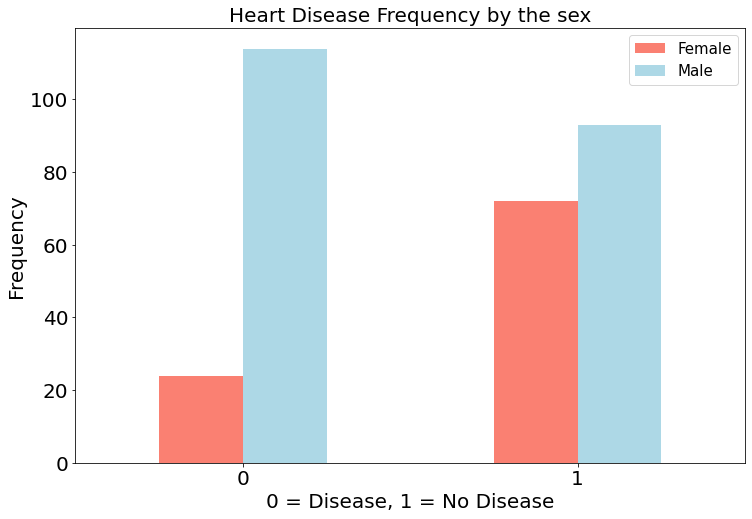

In [7]:
pd.crosstab(df.target, df.sex).plot.bar(figsize=(12,8), color=["salmon", "lightblue"],fontsize=20)

plt.title("Heart Disease Frequency by the sex",fontsize=20)
plt.xlabel("0 = Disease, 1 = No Disease",fontsize=20)
plt.ylabel("Frequency",fontsize=20)
plt.legend(["Female", "Male"],fontsize=15)
plt.xticks(rotation=0);

Patient without heart disease:138
Patient with heart disease:165

Patient without heart disease:46.0%
Patient with heart disease:54.0%


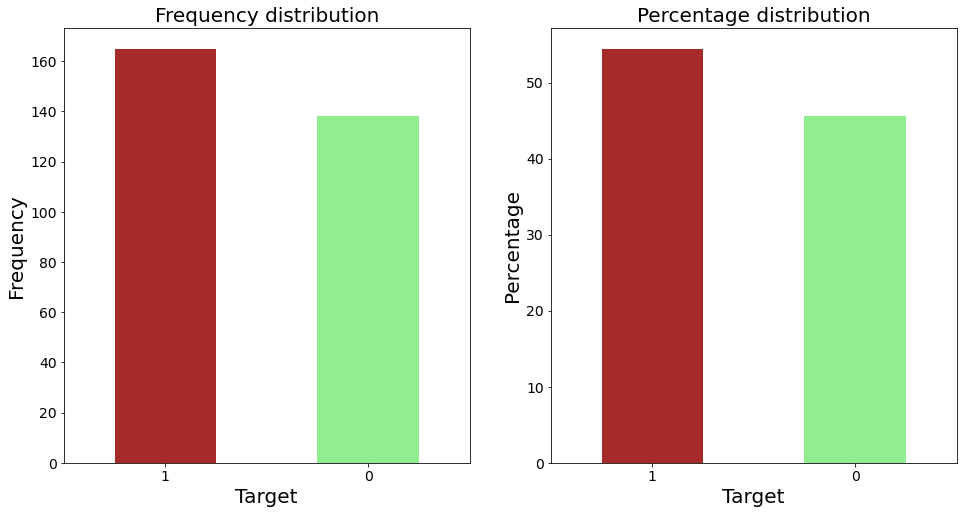

In [8]:
###########################################
#########################################
# Farben scheiße, aber kp welche, dachte halt für gesunden menschen grün und ungesund was dunkelrotes oder so 
# weil offensichtlich direkt wie eine Ampel aber kp sieht halt hässlich aus

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,8))

#Plot the frequency distribution of patients with and without heart disease 
plt.subplot(1,2,1)
ax1 = df['target'].value_counts().plot.bar(fontsize= 14, rot=0, color=['brown','lightgreen']);
ax1.set_title("Frequency distribution", fontsize=20);
ax1.set_xlabel("Target", fontsize=20);
ax1.set_ylabel("Frequency", fontsize=20);

#Plot the percentage distribution of patient with and without heart disease
plt.subplot(1,2,2)
ax2 = ((df['target'].value_counts() / len(df)) * 100).plot.bar(fontsize= 14, rot=0, color=['brown','lightgreen']);
ax2.set_title("Percentage distribution", fontsize=20);
ax2.set_xlabel("Target", fontsize=20);
ax2.set_ylabel("Percentage", fontsize=20);

print('Patient without heart disease:{}\nPatient with heart disease:{}'.format(round(df['target'].value_counts()[0]),
                                         round(df['target'].value_counts()[1])))
print('\nPatient without heart disease:{}%\nPatient with heart disease:{}%'.format(round(df['target'].value_counts(normalize=True)[0],2)*100,
                                           round(df['target'].value_counts(normalize=True)[1],2)*100))

In [9]:
df['age'].unique()

array([63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59,
       42, 61, 40, 71, 51, 65, 53, 46, 45, 39, 47, 62, 34, 35, 29, 55, 60,
       67, 68, 74, 76, 70, 38, 77], dtype=int64)

Text(0, 0.5, 'Frequency')

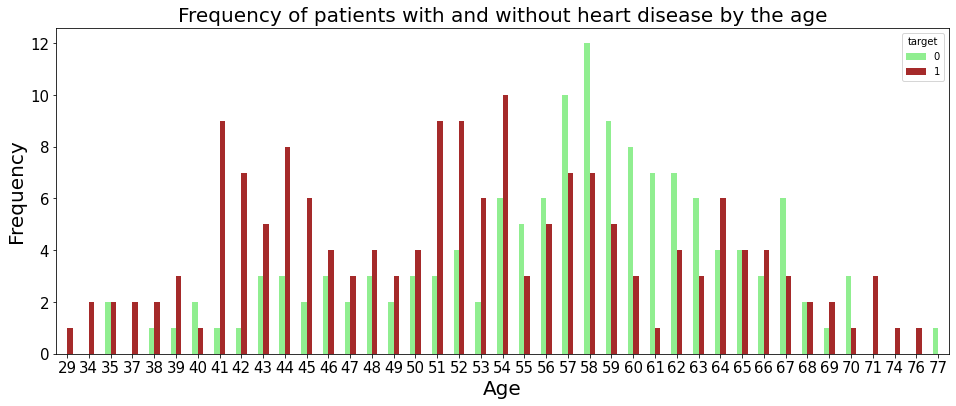

In [10]:
#Plot the frequency of patients with and without heart disease by the age

#ax = df[df['target'] == 1]['age'].value_counts().sort_index().plot.bar(figsize=(15, 6), fontsize= 15, rot=0, color='steelblue')
ax = pd.crosstab(df["age"], df["target"]).plot.bar(figsize=(16, 6), fontsize= 15, rot=0, color=['lightgreen','brown'])
ax.set_title("Frequency of patients with and without heart disease by the age", fontsize=20)
ax.set_xlabel("Age", fontsize=20)
ax.set_ylabel("Frequency", fontsize=20)

################################
# Verstehe halt nicht wie das umgesetzt wird, und ob das mit df = df_hd.append(df_whd) wichtig für einen richtigen plot ist?

# df_hd = df[df["target"] == 1]  # dataframe of Heart diseases
# df_whd = df[df["target"] == 0]  # dataframe of Without Heart diseases
# df = df_hd.append(df_whd)
# pd.crosstab(df["age"], df["target"]).plot(kind="bar", figsize=(20, 6))
# plt.title("Heart Disease Frequency for Ages")
# plt.xlabel("Age")
# plt.ylabel("Frequency")

## Correlation Matrix

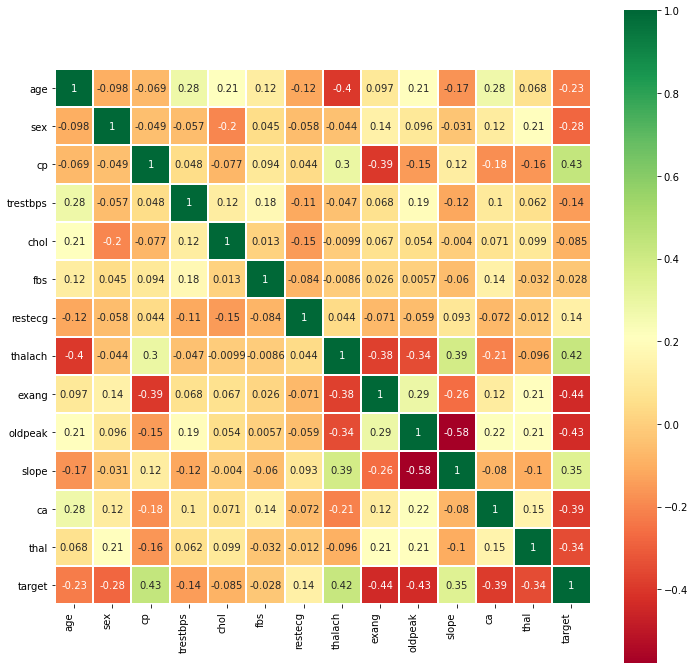

In [11]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(12,12))
h = sns.heatmap(corr, cmap=plt.cm.RdYlGn, annot=True, linewidths=1, square=True, ax=ax)
ax.set_ylim(len(corr),0) 
h.set_xticklabels(h.get_xticklabels(), rotation=90, ha='right')
h.set_yticklabels(h.get_yticklabels(), rotation=0, ha='right');

In [12]:
corr_matrix = df.corr()
corr_matrix["target"].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

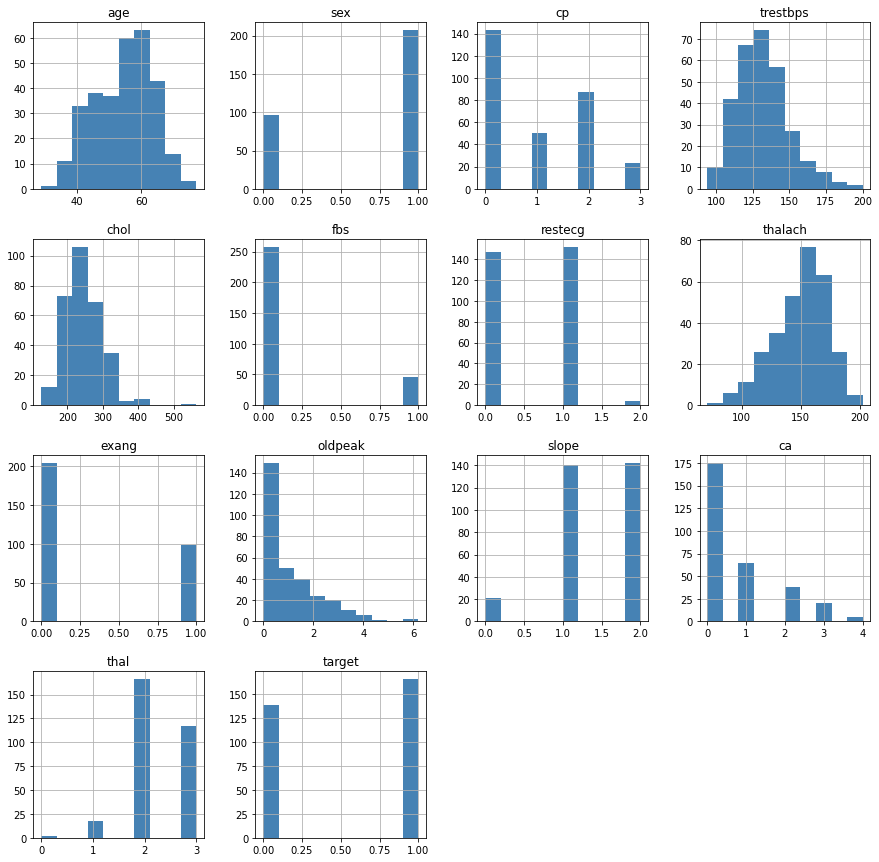

In [13]:
df.hist(figsize=(15,15), color = 'steelblue')

In [14]:
#sns.pairplot(df, kind='reg')

# Preprocess

In [15]:
# Divide the data to target and features
X = df.drop(['target'], axis=1)
y = df.target

#Encode the catergorical data in the features data
X_encoded = pd.get_dummies(df, columns=['sex', 'cp','fbs','restecg','exang','slope','ca','thal'])
X_encoded.head()

##################################################
# Welches davon nehmen wir?

#     # Due to the description of the features, some of them are categorical not numbers
# heart_data = df
# heart_data['sex'] = heart_data['sex'].astype('object')
# heart_data['cp'] = heart_data['cp'].astype('object')
# heart_data['fbs'] = heart_data['fbs'].astype('object')
# heart_data['restecg'] = heart_data['restecg'].astype('object')
# heart_data['exang'] = heart_data['exang'].astype('object')
# heart_data['slope'] = heart_data['slope'].astype('object')
# heart_data['thal'] = heart_data['thal'].astype('object')

# heart_data = pd.get_dummies(heart_data, drop_first=True)

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


### Spliting the data set to trainset (80%) and test set (20%)

In [16]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state = 1)

# Resampling

# -> TARAS

# Kann es sein, dass man das am Ende durchführt und auf beliebigen Algoritmus anwenden kann? Das ist Vorlesung 3 und das ganze ist ja eigentlich als Evaluation markiert 
## Was ich hier drunter gemacht habe, so wurde das auch in der Übung aber halt für lineare regression angewendet und ich denke wir werden dann das am Ende eher verwenden, wenn ich das richtig verstehe... Guck dir das mal auch bei gelegenheit an, ob ich das richtig verstehe?

### Validation set approach
1. Randomly divide the available set of samples in two parts, a training set and a validation set
2. Fit the model on the training set
3. Use the model to predict the responses for the observations in the validation set
4. The resulting validation set error rate (MSE) is an estimate of the test error rate.

In [17]:
# Set the random seed so that we always get the same results
np.random.seed(0) ##### Oder sollte das eine Zahl sein? Bin wieder verwirrt...

# Randomly assign a True or False value (True for training; False for testing)
training = np.random.choice([False, True], size=303)

# Training set
y_train = y[training]
x_train = sm.add_constant(X_encoded[training])

# Validation set
y_test = y[~training]
x_test = sm.add_constant(X_encoded[~training])

In [18]:
# Fit a linear Model and Evaluate MSE
linear_model = sm.OLS(y_train, x_train)
linear_results = linear_model.fit()

# Use model on the validation set (predict the results of the test set)
y_predictions = linear_results.predict(x_test)

# Compute Linear Model MSE
print('Linear Model MSE = ', np.mean((y_test.values-y_predictions)**2))

Linear Model MSE =  1.316210427989875e-30


In [19]:
# Fit a Quadratic Model and Evaluate MSE 
# add the quadratic term to the design matrix
x_train = sm.add_constant(np.column_stack((X_encoded[training], X_encoded[training]**2)))
x_test = sm.add_constant(np.column_stack((X_encoded[~training], X_encoded[~training]**2)))

# make the model and fit
quad_model = sm.OLS(y_train, x_train)
quad_model_results = quad_model.fit()

# use the model on the validation set
y_predictions = quad_model_results.predict(x_test)

print('\nQuadratic Model MSE = ', np.mean((y_test.values-y_predictions)**2))


Quadratic Model MSE =  4.993607720275545e-23


In [20]:
# Fit a Cubic Model and Evaluate MSE
# add the cubic term to the design matrix
x_train = sm.add_constant(np.column_stack((X_encoded[training], X_encoded[training]**2, 
                                           X_encoded[training]**3 )))
x_test = sm.add_constant(np.column_stack((X_encoded[~training], X_encoded[~training]**2,
                                          X_encoded[~training]**3)))

# make the model and fit
cube_model = sm.OLS(y_train, x_train)
cube_model_results = cube_model.fit()

# use the model on the validation set
y_predictions = cube_model_results.predict(x_test)

print('\nCubic Model MSE = ', np.mean((y_test.values-y_predictions)**2))


Cubic Model MSE =  7.860267409461519e-19


### Leave-one-out cross validation (LOOCV)

In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt

X = X_encoded.values
X = X[:,np.newaxis] # np.newaxis adds one dimension more (1Darray becomes a 2D array)
y = df.target.values

# Perform LOOCV for 5 Polynomial Models

# create arrays for polynomial order and error estimates
orders = np.arange(1,6)
mse_est = []

for index, order in enumerate(orders):
    # create a polynomial of degree order, don't add bias, LinearRegression does so below
    # degree: The degree of the polynomial features
    # interaction_only: If true, only interaction features are produced
    # include_bias: If True (default), then include a bias column, the feature in which all polynomial powers are zero
    poly = PolynomialFeatures(degree=order,interaction_only=False, include_bias=False)
        
    # create a linear model and Fit
    regress = LinearRegression()
    regress.fit(poly.fit_transform(X),y)
    
    # print the coeffecients
    print('Coefficients: Intercept, Beta(s)', regress.intercept_, regress.coef_)
    
    # Evaluate the model using Leave-one-out cross-validation (cv = len(X)) to get the MSE estimate
    scorer = sklearn.metrics.make_scorer(mean_squared_error)
    mse_est.append(np.mean(sklearn.model_selection.cross_val_score(regress, poly.fit_transform(X), y, scoring= scorer, cv=len(X))))
    
# print the estimated test MSEs for each model
print('\nThe estimated test MSEs = ', mse_est)
# plt the estimate 
fig , ax = plt.subplots(figsize=(6,4))
ax.plot(orders,mse_est,linestyle = '-.', marker='o',color='k');
ax.set_xlabel('Polynomial Order');
ax.set_ylabel('LOOCV Error Rate');

ValueError: Found array with dim 3. Estimator expected <= 2.

### k-Fold Cross-Validation (k-fold CV)

### Bootstrap?

# Subset Selection Methods
Indentifying a subset of the p predictors that are related to the response
Fit the model using least squares on the reduced set of variables

### Best Subset Selection
Best subset selection forms every possible model from the predictors. It then compares models with the same number of predictors using RSS or R^2. Once the best model is picked for a given number of predictors, Models with different numbers of predictors are compared using one of the information criteria (AIC, BIC, Adj R^2), or by Cross-validation to select the model with the lowest TEST MSE among the models selected in the previous step.

In general, this method is not used because the computational cost is high. For a model with p-predictors, we must consider 2^p models. As there is not a 'built-in' sklearn module for doing this. We will write a few helper functions to accomplish model selection

# -> TARAS Man kann das auch für andere wie Logistic Regression machen, so wie ich das verstanden habe

In [129]:
from tqdm import tqdm # a python package that provides progress bars for iterables
from operator import itemgetter
from itertools import combinations
from sklearn.model_selection import KFold

# Function, that performs the best subset selection
# The return value of the function is a list, that saves the best model for each number of predictors
def best_subsets(dataframe, predictors, response, max_features):
    
    def process_linear_model(features):
        # Create design maxtrix
        X = sm.add_constant(dataframe[features])
        y = dataframe[response]
        
        # build and fit the linear model and return model and RSS value
        model = sm.OLS(y,X).fit()
        RSS = model.ssr
        return (model, RSS)
    
    def get_best_kth_model(k):
        results = [] #list with the results
        
        # loop over all possible combinations of k features
        for combo in combinations(predictors, k):
            # process linear model with this combination of features
            results.append(process_linear_model(list(combo)))
        
        # sort the models and return the one with the smallest RSS (the one at index 0 of the sorted results list)
        return sorted(results, key= itemgetter(1)).pop(0)[0]  
        
    models=[]
    
    # loop over all possibilities for k and create the progress bar, for each k save the best model in the list models
    # tqdm function here to obtain a nice progress bar
    for k in tqdm(range(1,max_features+1)):
        models.append(get_best_kth_model(k))
        
    return models

In [130]:
# Define the predictors
predictors = list(df.columns)
predictors.remove('target')

# Call our best_subsets function 
models = best_subsets(df, predictors, ['target'], max_features=13)

100%|██████████| 13/13 [00:47<00:00,  3.65s/it]


In [131]:
# The best variables of the model as predictors
models[12].params

const       0.828899
age        -0.000820
sex        -0.195996
cp          0.112703
trestbps   -0.001991
chol       -0.000354
fbs         0.017374
restecg     0.049848
thalach     0.003019
exang      -0.144046
oldpeak    -0.058789
slope       0.078979
ca         -0.100602
thal       -0.119039
dtype: float64

Just the results of the upper function because of the runtime, so we dont have to run the function many times:

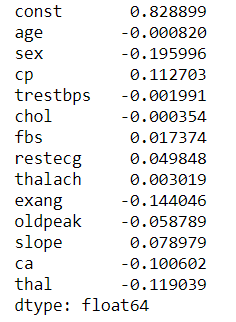

Vizualizing the AIC, BIC, adjusted R^2 of the best model for each number of predictors

AIC and BIC: estimators of prediction error of statistical models for a given set of data. -> The smaller AIC or BIC is, the better the model
Main difference: penalty term for the number of parameters (AIC=2*p, BIC=ln(n)*p)


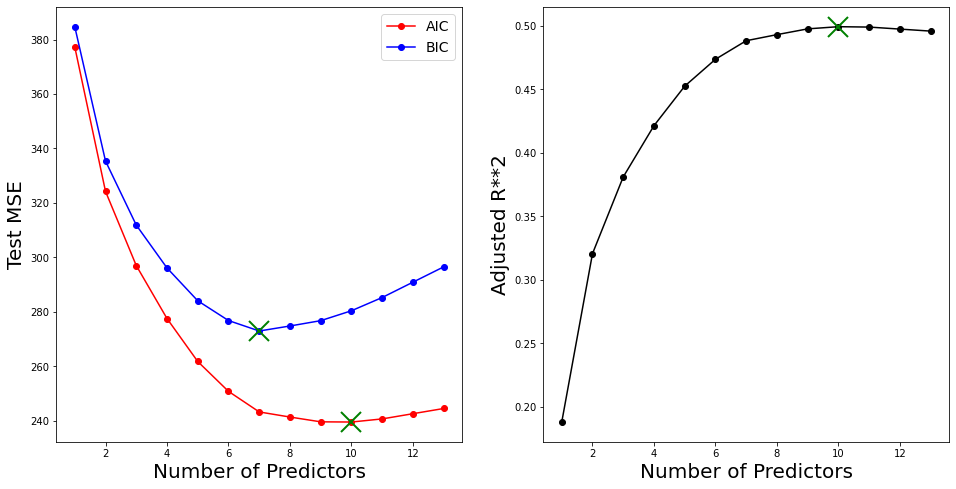

In [132]:
# Create plots of the statistics
aics = [models[x].aic for x in range(len(models))]
bics = [models[x].bic for x in range(len(models))]
r_adj = [models[x].rsquared_adj for x in range(len(models))]

# find the minimum and maximum
min_aic_index, min_aic = min(enumerate(aics), key=itemgetter(1))
min_bic_index, min_bic = min(enumerate(bics), key=itemgetter(1))
max_radj_index, max_radj = max(enumerate(r_adj), key=itemgetter(1))

# List
num_predictors = np.linspace(1,len(models),len(models)) 
# Create a plot
fig,(ax1, ax2) = plt.subplots(1,2,figsize=(16,8))
# Add test MSE estimates
ax1.plot(num_predictors, aics, 'r', marker='o', label='AIC');
ax1.plot(num_predictors, bics, 'b', marker='o', label='BIC')

# add the minimums to the axis
ax1.plot(min_aic_index+1, min_aic, 'gx', markersize=20, markeredgewidth=2)
ax1.plot(min_bic_index+1, min_bic, 'gx', markersize=20, markeredgewidth=2)

# Labels and Legend
ax1.set_xlabel('Number of Predictors', fontsize=20);
ax1.set_ylabel('Test MSE', fontsize=20);
ax1.legend(loc='best', fontsize=14);

# Add Adj R**2 to the second subplot
ax2.plot(num_predictors, r_adj,'k', marker='o')
ax2.plot(max_radj_index+1, max_radj, 'gx', markersize=20, markeredgewidth=2)
ax2.set_xlabel('Number of Predictors', fontsize=20);
ax2.set_ylabel('Adjusted R**2', fontsize=20);

In [133]:
# Lowest BIC model has 7 following coefficients 
models[7].params

const       0.822111
sex        -0.185207
cp          0.113645
trestbps   -0.002338
thalach     0.003564
exang      -0.152103
oldpeak    -0.081109
ca         -0.099669
thal       -0.120933
dtype: float64

# Stepwise selection
Stepwise methods explore a restricted set of models. They are good alternatives to best subset selection

### Forward Stepwise Selection
The Forward Stepwise Selection algortihm sequentially adds predictors to the null model selecting the predictors that result in the lowest RSS for each added predictor. It then compares models with different features using Information Criteria or Cross-Validatation.

In [134]:
# Function, that performs the forward stepwise selection
# The return value of the function is a list, that saves the best model for each number of predictors
def forward_step_select(df, predictors, response, max_features=len(predictors)):
    
    def process_linear_model(features):
        # Create design matrix
        X = sm.add_constant(df[features])
        y = df[response]
        
        # Build and fit the linear model and return model and RSS value
        model = sm.OLS(y,X).fit()
        RSS = model.ssr
        return (model, RSS)
    
    def update_model(best_features, remaining_features):
        results = []
        
        for feature in remaining_features:
            results.append(process_linear_model(best_features + [feature]))
            
        # select model with the lowest RSS
        new_model = sorted(results, key=itemgetter(1)).pop(0)[0]
        new_features = list(new_model.params.index)[1:]
        
        return new_features, new_model
    
    # Create list to hold models, model features and the remaining features to test
    models = []
    best_features = []
    remaining_features = predictors
    
    while remaining_features and len(best_features) < max_features:
        # get the best new feature set from update_model
        new_features, new_model = update_model(best_features, remaining_features)
        # update the best features to include the one we just found
        best_features = new_features  
        # reduce the available features for the next round
        remaining_features =  [feature for feature in predictors if feature not in best_features]
        
        # append the new_features and model so we can compare models with different features later
        models.append((new_features,new_model))
        
    return models

In [135]:
# Define the predictors
predictors = list(df.columns)
predictors.remove('target')

# Call our best_subsets function 
models = forward_step_select(df, predictors, ['target'], max_features=13)

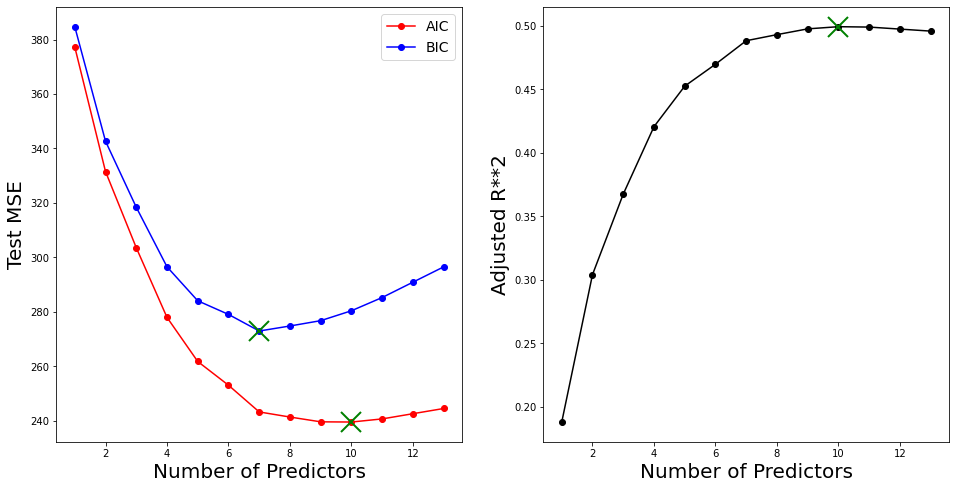

In [137]:
# Almost the same plot as earlier, with only difference at the beginning
# Create plots of the statistics
aics = [models[x][1].aic for x in range(len(models))]
bics = [models[x][1].bic for x in range(len(models))]
r_adj = [models[x][1].rsquared_adj for x in range(len(models))]

# find the minimum and maximum
min_aic_index, min_aic = min(enumerate(aics), key=itemgetter(1))
min_bic_index, min_bic = min(enumerate(bics), key=itemgetter(1))
max_radj_index, max_radj = max(enumerate(r_adj), key=itemgetter(1))

# List
num_predictors = np.linspace(1,len(models),len(models)) 
# Create a plot
fig,(ax1, ax2) = plt.subplots(1,2,figsize=(16,8))
# Add test MSE estimates
ax1.plot(num_predictors, aics, 'r', marker='o', label='AIC');
ax1.plot(num_predictors, bics, 'b', marker='o', label='BIC')

# add the minimums to the axis
ax1.plot(min_aic_index+1, min_aic, 'gx', markersize=20, markeredgewidth=2)
ax1.plot(min_bic_index+1, min_bic, 'gx', markersize=20, markeredgewidth=2)

# Labels and Legend
ax1.set_xlabel('Number of Predictors', fontsize=20);
ax1.set_ylabel('Test MSE', fontsize=20);
ax1.legend(loc='best', fontsize=14);

# Add Adj R**2 to the second subplot
ax2.plot(num_predictors, r_adj,'k', marker='o')
ax2.plot(max_radj_index+1, max_radj, 'gx', markersize=20, markeredgewidth=2)
ax2.set_xlabel('Number of Predictors', fontsize=20);
ax2.set_ylabel('Adjusted R**2', fontsize=20);

# Unsupervised

### 1.PCA - sollte man vlt was schreiben wieso das keinen sinn gemacht hat zu machen

### 2. K-means clustering

# TARAS -> Was machen wir damit? Sollte man das dann nicht für voll viele variablen durchführen?

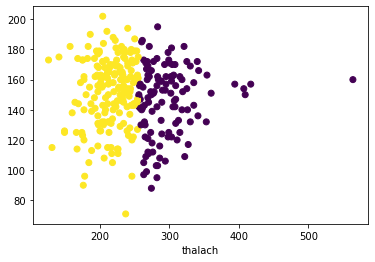

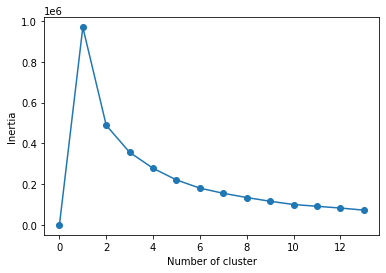

In [86]:
data2 = df.loc[:, ["chol", "thalach"]]

kmeans = KMeans(n_clusters=2)
kmeans.fit(data2)
labels = kmeans.predict(data2)
plt.scatter(df["chol"], df["thalach"], c=labels)
plt.xlabel("chol")
plt.xlabel("thalach")
plt.show()

# inertia
inertia_list = np.empty(14)
for i in range(1, 14):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data2)
    inertia_list[i] = kmeans.inertia_
plt.plot(range(0, 14), inertia_list, "-o")
plt.xlabel("Number of cluster")
plt.ylabel("Inertia")
plt.show()

### 3. Hierarchical clustering

# Supervised

## Classification Algorithms

### 1. Logistic Regression 

Test Accuracy 49.18%


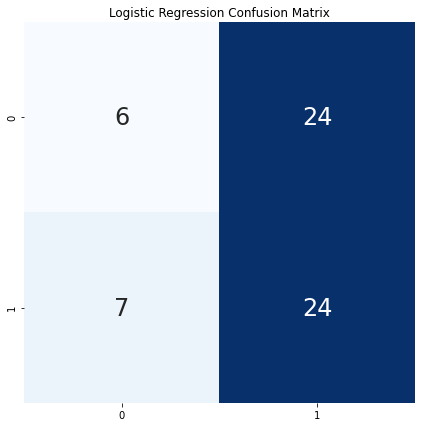

In [85]:
#Create Logistic regression model and train the model
from sklearn.linear_model import LogisticRegression 
import statsmodels.api as sm

X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# Accuracy
accuracies = {}
lr = LogisticRegression()
lr.fit(x_train, y_train)
acc = lr.score(x_test, y_test) * 100
accuracies["Logistic Regression"] = acc
print("Test Accuracy {:.2f}%".format(acc))

# Confusion matrix
from sklearn.metrics import confusion_matrix
y_head_lr = lr.predict(x_test)
cm_lr = confusion_matrix(y_test, y_head_lr)

plt.figure(figsize=(7, 7))
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24})

plt.show()

# TARAS -> guck mal wie unterschiedlich die Ergebnisse ausfallen wenn man random state auf 1 setzt, was machen wir damit? :D

Test Accuracy 83.61%


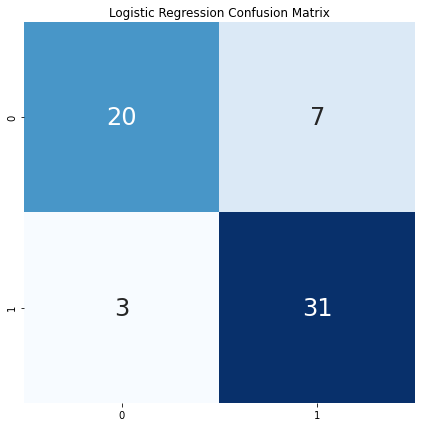

In [72]:
###### Von Taras
y = df.target.values
x_data = df.drop(["target"], axis=1)

# Normalize
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values ####WOZU?

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) ##### Warum nicht 1?

#     # transpose matrices
#     x_train = x_train.T
#     y_train = y_train.T
#     x_test = x_test.T
#     y_test = y_test.T

# accuracies = {}

# lr = LogisticRegression()
# lr.fit(x_train.T, y_train.T)
# acc = lr.score(x_test.T, y_test.T) * 100

# accuracies["Logistic Regression"] = acc
# print("Test Accuracy {:.2f}%".format(acc))

# y_head_lr = lr.predict(x_test.T)
# cm_lr = confusion_matrix(y_test, y_head_lr)

# plt.figure(figsize=(10, 10))
# plt.title("Logistic Regression Confusion Matrix")
# sns.heatmap(cm_lr, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24})

# plt.show()


###### Ohne .T
accuracies = {}

lr = LogisticRegression()
lr.fit(x_train, y_train)
acc = lr.score(x_test, y_test) * 100

accuracies["Logistic Regression"] = acc
print("Test Accuracy {:.2f}%".format(acc))

y_head_lr = lr.predict(x_test)
cm_lr = confusion_matrix(y_test, y_head_lr)

plt.figure(figsize=(7, 7))
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24})

plt.show()

### 2. Linear discriminant analysis

Test Accuracy of LDA Algorithm: 50.82%


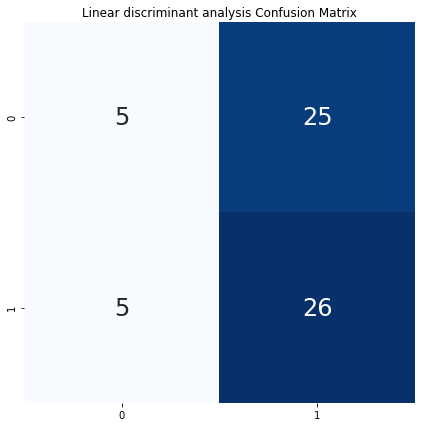

In [48]:
from sklearn.model_selection import train_test_split  # for data splitting
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# Create LDA Classifier and Fit
# store_covariancebool, default=False
# If True, explicitely compute the weighted within-class covariance matrix when solver is ‘svd’. 
# The matrix is always computed and stored for the other solvers
clf = LDA(solver='lsqr', store_covariance = True) 
clf.fit(X_train, y_train)

# Predict Test Set Responses 
y_predict = clf.predict(X_test)
# convert the predicted probabilities to class 0 or 1
# if y > 0,5 then 1, else 0
y_predicted= np.array(y_predict > 0.5, dtype=float)  ##### Nicht klar ob das nötig ist, ist aus der Übung

# Accuracy
accuracies = {}
acc = clf.score(x_test, y_test) * 100
accuracies["LDA"] = acc
print("Test Accuracy of LDA Algorithm: {:.2f}%".format(acc))

# Confusion matrix
from sklearn.metrics import confusion_matrix

y_head_clf = clf.predict(x_test)
cm_clf = confusion_matrix(y_test, y_head_clf)
    
plt.figure(figsize=(7, 7))
plt.title("Linear discriminant analysis Confusion Matrix")
sns.heatmap(cm_clf, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24})
plt.show()

# table = np.histogram2d(y_predict, y_test, bins=2)[0]
# print('CONFUSION MATRIX')
# print(pd.DataFrame(table, ['Down', 'Up'], ['Down', 'Up']))
# print('\n')
# print('Error Rate =', 1-(table[0,0]+table[1,1])/np.sum(table))



### 3. Quadratic discriminant analysis

Test Accuracy of QDA Algorithm: 67.21%


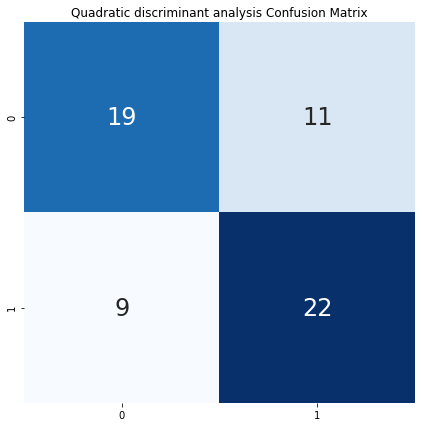

In [81]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# Create LDA Classifier and Fit
qclf = QDA(store_covariance = True)
qclf.fit(X_train, y_train)

# Predict Test Set Responses 
y_predict = qclf.predict(X_test)
# convert the predicted probabilities to class 0 or 1
y_predicted= np.array(y_predict > 0.5, dtype=float)

accuracies = {}
acc = qclf.score(X_test, y_test) * 100
accuracies["QDA"] = acc
print("Test Accuracy of QDA Algorithm: {:.2f}%".format(acc))

# Confusion matrix
from sklearn.metrics import confusion_matrix

y_head_qclf = qclf.predict(X_test)
cm_qclf = confusion_matrix(y_test, y_head_qclf)
    
plt.figure(figsize=(7, 7))
plt.title("Quadratic discriminant analysis Confusion Matrix")
sns.heatmap(cm_qclf, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24})
plt.show()


### 4. K-nearest neighbor

{'leaf_size': 1, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
Accuracy Score:  0.9016393442622951
Using k-NN we get an accuracy score of:  90.164 %
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



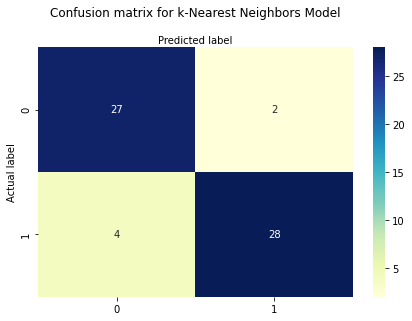

In [88]:
# splitting the data
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scaling the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

# Implementing GridSearchCv to select best parameters and applying k-NN Algorithm

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
params = {
        "n_neighbors": list(range(1, 20)),
        "p": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        "leaf_size": list(range(1, 20)),
        "weights": ["uniform", "distance"],
    }

model = GridSearchCV(knn, params, cv=3, n_jobs=-1)

model.fit(X_train, y_train)
print(model.best_params_)

# Making predictions

predict = model.predict(X_test)

# Checking accuracy

from sklearn.metrics import accuracy_score, confusion_matrix

print("Accuracy Score: ", accuracy_score(y_test, predict))
print("Using k-NN we get an accuracy score of: ",
        round(accuracy_score(y_test, predict), 5) * 100,
        "%",
    )

from sklearn.metrics import (
    recall_score,
    precision_score,
    classification_report,
    roc_auc_score,
    roc_curve,
    )

print(classification_report(y_test, predict))

# confusion matrix

class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
cnf_matrix = confusion_matrix(y_test, predict)

# create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt="g")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion matrix for k-Nearest Neighbors Model", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.show()

### 5. Support vector machines

Test Accuracy of SVM Algorithm: 83.61%


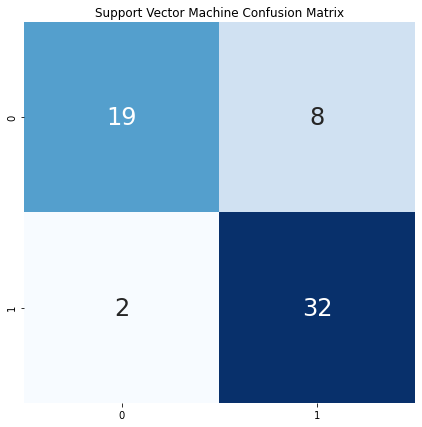

In [93]:
from sklearn.svm import SVC

y = df.target.values
x_data = df.drop(["target"], axis=1)
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#     # transpose matrices
#     x_train = x_train.T
#     y_train = y_train.T
#     x_test = x_test.T
#     y_test = y_test.T

svm = SVC(random_state=1)
svm.fit(x_train, y_train)

accuracies = {}
acc = svm.score(x_test, y_test) * 100
accuracies["SVM"] = acc

print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

from sklearn.metrics import confusion_matrix

y_head_svm = svm.predict(x_test)
cm_svm = confusion_matrix(y_test, y_head_svm)

plt.figure(figsize=(7, 7))

plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24})
plt.show()

### 6. Decision trees

{'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 11}
Accuracy Score:  0.7252747252747253
Using Decision Tree we get an accuracy score of:  72.527 %
              precision    recall  f1-score   support

           0       0.67      0.76      0.71        41
           1       0.78      0.70      0.74        50

    accuracy                           0.73        91
   macro avg       0.73      0.73      0.72        91
weighted avg       0.73      0.73      0.73        91



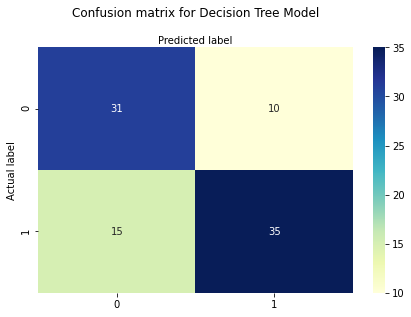

In [89]:
# splitting the data
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# scaling the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dtree = DecisionTreeClassifier(random_state=7)

# Setting parameters for GridSearchCV
params = {
    "max_features": ["auto", "sqrt", "log2"],
    "min_samples_split": [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    "min_samples_leaf": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
    }
tree_model = GridSearchCV(dtree, param_grid=params, n_jobs=-1)

tree_model.fit(X_train, y_train)
# Printing best parameters selected through GridSearchCV
print(tree_model.best_params_)

# Making a prediction
predict = tree_model.predict(X_test)

# Accuracy Metrics

from sklearn.metrics import accuracy_score

print("Accuracy Score: ", accuracy_score(y_test, predict))
print("Using Decision Tree we get an accuracy score of: ",
        round(accuracy_score(y_test, predict), 5) * 100,
        "%",
    )

# Classification report

from sklearn.metrics import classification_report, roc_auc_score, roc_curve

print(classification_report(y_test, predict))

class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
from sklearn.metrics import accuracy_score, confusion_matrix

cnf_matrix = confusion_matrix(y_test, predict)

# create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt="g")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion matrix for Decision Tree Model", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.show()

### 7. Random forest

In [87]:
dt = df
X_train, X_test, y_train, y_test = train_test_split(dt.drop("target", 1), dt["target"], test_size=0.2, random_state=10)
model = RandomForestClassifier(max_depth=5)  # here you can change the depth of the model
model.fit(X_train, y_train)

estimator = model.estimators_[1]
feature_names = [i for i in X_train.columns]

y_train_str = y_train.astype("str")
y_train_str[y_train_str == "0"] = "no disease"
y_train_str[y_train_str == "1"] = "disease"
y_train_str = y_train_str.values

export_graphviz(
    estimator,
    out_file="tree.dot",
    feature_names=feature_names,
    class_names=y_train_str,
    rounded=True,
    proportion=True,
    label="root",
    precision=2,
    filled=True,
    )

from subprocess import call
from IPython.display import Image

    # call(["dot", "-Tpng", "tree.dot", "-o", "tree.png", "-Gdpi=600"])
    # Image(filename="tree.png")

    # NEED TO INSTALL GRAPHVIZ FOR USING IT ON PYCHARM
    # USE: choco install graphviz (in windows terminal)
    # OR: winget install graphviz (in windows terminal)

    # evaluate the model:

y_predict = model.predict(X_test)
y_pred_quant = model.predict_proba(X_test)[:, 1]
y_pred_bin = model.predict(X_test)

# Assess the fit with a confusion matrix:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred_bin)
confusion_matrix

total = sum(sum(confusion_matrix))

sensitivity = confusion_matrix[0, 0] / (confusion_matrix[0, 0] + confusion_matrix[1, 0])
print("Sensitivity : ", sensitivity)

specificity = confusion_matrix[1, 1] / (confusion_matrix[1, 1] + confusion_matrix[0, 1])
print("Specificity : ", specificity)

Sensitivity :  0.8484848484848485
Specificity :  0.75
